In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
# Dependencies and setup
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Independent T-Tests¶

Here we examine whether there is a statistically significant difference in average new daily Covid-19 cases of states that reopened bars, nightclubs, recreational venues, and laxed restaurant dine-in restrictions verses states that did not reopen under such parameters during the same time frame. 

Sample 1 includes Florida, Georgia, and Texas. Since these 3 states implemented similar reopening guidelines on June 5th, June 1st, and May 22nd, respectively, we considered daily new Covid-19 cases from June 1st through July 17th.  

Sample 2 includes New York, New Jersey, and Connecticut, all of which did not have such reopening guidelines.

By running an independent t-test we will compare the means of the 2 independent populations and will be able to see any statistical significant differences between the 2.


In [109]:
# Open csv file containing daily new Covid-19 cases and read file as a data frame
df = pd.read_csv("/Users/kiranrangaraj/Desktop/Classwork/Group-Project/output_data/DailyCount.csv")
df.head()

,State,Date,Daily_Count
0,Connecticut,2020-03-08,0
1,Connecticut,2020-03-09,0
2,Connecticut,2020-03-10,1
3,Connecticut,2020-03-11,1
4,Connecticut,2020-03-12,3


In [110]:
# Set timeframe parameters
start_date = '2020-06-01'
end_date = '2020-07-17'
after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
df = df.loc[between_two_dates]
df

,State,Date,Daily_Count
85,Connecticut,2020-06-01,539
86,Connecticut,2020-06-02,239
87,Connecticut,2020-06-03,112
88,Connecticut,2020-06-04,148
89,Connecticut,2020-06-05,221
...,...,...,...
776,Texas,2020-07-13,5655
777,Texas,2020-07-14,10745
778,Texas,2020-07-15,7307
779,Texas,2020-07-16,10291


In [111]:
# Set data frame index to state
bars_reopened = df.set_index('State')
bars_reopened

,Date,Daily_Count
State,,
Connecticut,2020-06-01,539
Connecticut,2020-06-02,239
Connecticut,2020-06-03,112
Connecticut,2020-06-04,148
Connecticut,2020-06-05,221
...,...,...
Texas,2020-07-13,5655
Texas,2020-07-14,10745
Texas,2020-07-15,7307


In [112]:
# Group the data for policy 1 states separately from policy 2 states
states1 = ['Florida', 'Georgia', 'Texas']
states2 = ['New York', 'New Jersey', 'Connecticut']
group1 = bars_reopened[bars_reopened.index.isin(states1)]
group2 = bars_reopened[bars_reopened.index.isin(states2)]

In [113]:
group1

,Date,Daily_Count
State,,
Florida,2020-06-01,667
Florida,2020-06-02,617
Florida,2020-06-03,1317
Florida,2020-06-04,1419
Florida,2020-06-05,1305
...,...,...
Texas,2020-07-13,5655
Texas,2020-07-14,10745
Texas,2020-07-15,7307


In [114]:
group2

,Date,Daily_Count
State,,
Connecticut,2020-06-01,539
Connecticut,2020-06-02,239
Connecticut,2020-06-03,112
Connecticut,2020-06-04,148
Connecticut,2020-06-05,221
...,...,...
New York,2020-07-13,557
New York,2020-07-14,912
New York,2020-07-15,831


In [115]:
# Calculate the average daily Covid-19 for the first group of states
group1_mean = group1['Daily_Count'].mean()
group1_mean

4273.475177304965

In [116]:
# Calculate the average daily Covid-19 for the second group of states
group2_mean = group2['Daily_Count'].mean()
group2_mean

401.2695035460993

The means generated for the 2 groups are noticeably different from each other. Group 1 had, on average, 4273 daily new cases of Covid-19 versus the 401 of group 2.

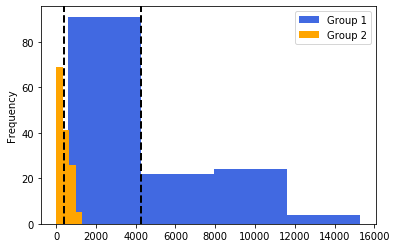

In [117]:
# Plot comparative histograms for the two independent state groups
# Histograms shows the distribution of the policy 1 states verses the policy 2 states

group1['Daily_Count'].plot.hist(color='royalblue', bins=4, label='Group 1')
group2['Daily_Count'].plot.hist(color='orange', bins=4, label='Group 2')
plt.axvline(group1['Daily_Count'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(group2['Daily_Count'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.legend()

In [99]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(group1.Daily_Count, group2.Daily_Count, equal_var=False)

Ttest_indResult(statistic=12.73767146105426, pvalue=2.9448198049160806e-25)

The t-test produced a p-value that is significantly smaller than 0.05, which indicates that the differences between the average Covid-19 daily cases in the two state groups is statistically significant. 

The averages between the two groups of states are so significantly different that the p-value being much lower than 0.000001, means there is less than one in a million chance of being wrong.

This indicates that the reopening of bars, nightclubs, recreational venues, and lax restaurant dine-in policies significantly contributed to higher transmissions of Covid-19.

# ANOVA¶

We then examined whether any of the 6 states was statistically signifcant.

We were able to establish that the policies in the 2 groups of states had a profound impact on Covid-19 count, however we did not consider if any of 6 the states was significantly different than the others. 

Creating a boxplot helps to visualize how the states compare in terms of daily new Covid-19 case distribution, the central values, and the variability.

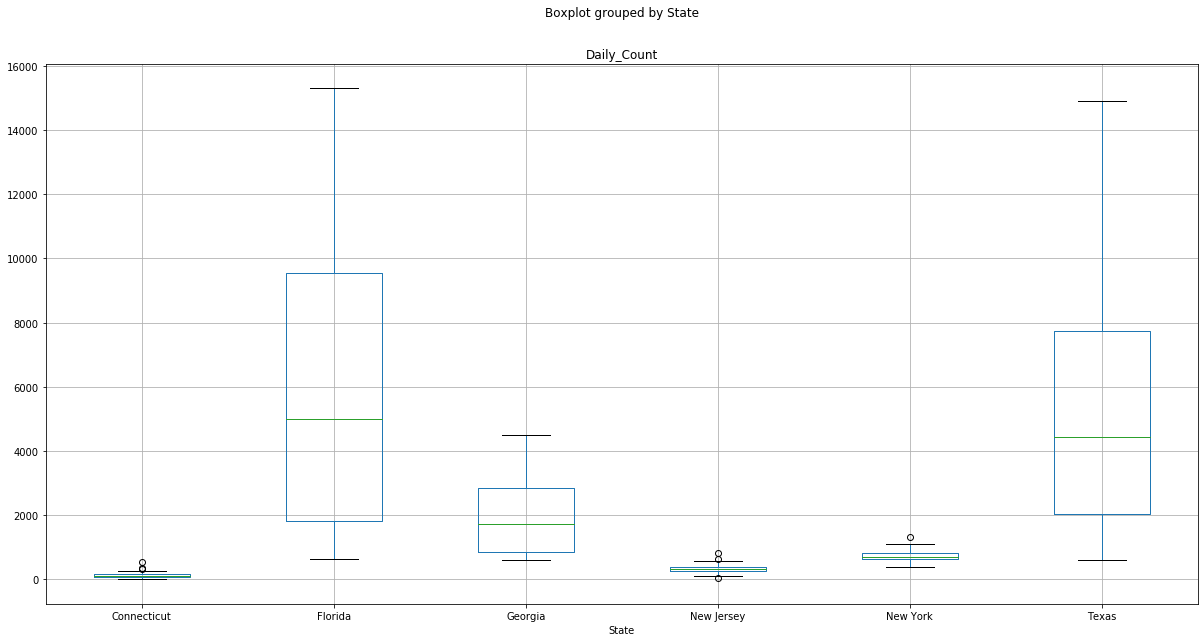

In [119]:
# Create a boxplot to compare means
bars_reopened.boxplot("Daily_Count", by="State", figsize=(20, 10))

Florida, Georgia and Texas have much higher daily Covid-19 counts than Connecticut, New Jersey, and New York. The daily Covid-19 highest and lowest values of Florida, Georgia and Texas are both higher than Connecticut, New Jersey, and New York in the corresponding values. These 3 states also have a median Covid-19 count that is higher than the other 3 states, and they also have an immensely larger interquartile range.

These results suggest that Florida, Georgia, and Texas are consistently experiencing higher Covid-19 counts than Connecticut, New Jersey, and New York. The higher variances in these 3 states also suggests that they experienced much larger fluctuations in the daily Covid-19 counts between June 1st and July 17th. 

In [104]:
# Extract individual groups
connecticut = df[df['State'] == 'Connecticut']['Daily_Count']
florida = df[df['State'] == 'Florida']['Daily_Count']
georgia = df[df['State'] == 'Georgia']['Daily_Count']
newjersey = df[df['State'] == 'New Jersey']['Daily_Count']
newyork = df[df['State'] == 'New York']['Daily_Count']
texas = df[df['State'] == 'Texas']['Daily_Count']

In [120]:
# Perform the ANOVA
stats.f_oneway(connecticut, florida, georgia, newjersey, newyork, texas)

F_onewayResult(statistic=58.26540963214147, pvalue=3.0112022192395693e-41)

A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Since the p-value here is drastically lower than the significance level, we have rejected the null hypothesis with no risk and concluded that not all of the 6 states Covid-19 means are equal.